# Data Science in a Day

## Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

## Loading Libraries

In [72]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import numpy as np

from sklearn.metrics import classification_report, confusion_matrix

## Data Sourcing

In [2]:
loans = pd.read_csv("loan_data.csv")
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [4]:
loans.shape

(981, 13)

In [5]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,959.000000,967.000000,931.000000
mean,5179.795107,1601.916330,141.768509,340.078594,0.809882
std,5695.104533,2718.772806,77.899222,70.246667,0.392605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Data Cleaning 

In [6]:
loans.isnull().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# get rid of the rows where gender is null
loans.dropna(subset=['Gender'], inplace = True)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loans['Married'].value_counts(dropna=False)

Yes    621
No     344
NaN      3
Name: Married, dtype: int64

In [11]:
# get rid of the rows where marreid is null
loans.dropna(subset=['Married'], inplace = True)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loans['Dependents'].value_counts(dropna=False)

0      548
1      159
2      158
3+      88
NaN     12
Name: Dependents, dtype: int64

In [14]:
# replace Nan dependents with 0
loans['Dependents'] = loans['Dependents'].fillna('0')
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loans['Self_Employed'].value_counts(dropna=False)

No     818
Yes    115
NaN     32
Name: Self_Employed, dtype: int64

In [16]:
# replace Nan self employed with No
loans['Self_Employed'] = loans['Self_Employed'].fillna('No')
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loans['LoanAmount'].value_counts(dropna=False)

 120.0    29
 110.0    26
 100.0    24
NaN       21
 187.0    21
 150.0    19
 125.0    18
 130.0    18
 90.0     15
 160.0    15
 113.0    14
 128.0    14
 135.0    14
 108.0    13
 104.0    12
 95.0     12
 80.0     12
 70.0     12
 96.0     11
 200.0    10
 185.0    10
 116.0    10
 180.0    10
 138.0    10
 115.0    10
 132.0     9
 140.0     9
 131.0     9
 152.0     9
 122.0     9
          ..
 380.0     1
 236.0     1
 308.0     1
 228.0     1
 376.0     1
 89.0      1
 54.0      1
 436.0     1
 304.0     1
 42.0      1
 178.0     1
 230.0     1
 336.0     1
 86.0      1
 79.0      1
 256.0     1
 77.0      1
 232.0     1
 57.0      1
 496.0     1
 36.0      1
 9.0       1
 26.0      1
 324.0     1
 196.0     1
 400.0     1
 250.0     1
 500.0     1
 246.0     1
 296.0     1
Name: LoanAmount, Length: 231, dtype: int64

In [18]:
# replace Nan LoanAmount with 0
loans['LoanAmount'] = loans['LoanAmount'].fillna(float(0))
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loans['Loan_Amount_Term'].value_counts(dropna=False)

 360.0    811
 180.0     65
 480.0     22
 300.0     19
NaN        14
 84.0       7
 240.0      7
 0.0        6
 120.0      4
 36.0       3
 60.0       3
 12.0       2
 350.0      1
 6.0        1
Name: Loan_Amount_Term, dtype: int64

In [20]:
# replace Nan LoanAmount Term with 0
loans['Loan_Amount_Term'] = loans['Loan_Amount_Term'].fillna(float(0))
loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
loans['Credit_History'].value_counts(dropna=False)

 1.0    742
 0.0    174
NaN      49
Name: Credit_History, dtype: int64

In [22]:
# replace Nan Credit History Term with 0
loans['Credit_History'] = loans['Credit_History'].fillna(float(0))
loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
loans.shape

(965, 13)

## Data Exploration

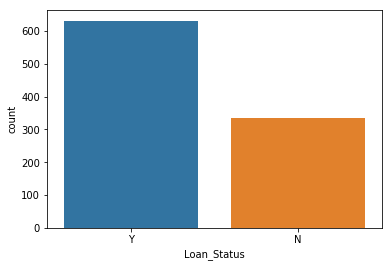

In [24]:
sns.countplot(x='Loan_Status', data = loans)

Text(0.5, 1.0, 'Applicant Income vs Loan Amount vs Accepted or Rejected')

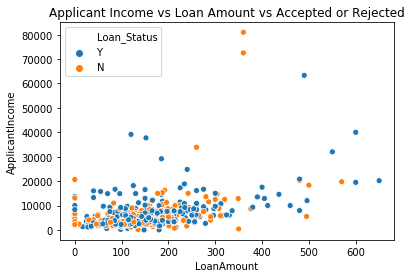

In [25]:
scatterplot = sns.scatterplot(x='LoanAmount', y = 'ApplicantIncome', hue= 'Loan_Status', data = loans)
scatterplot.set_title('Applicant Income vs Loan Amount vs Accepted or Rejected')

Text(0.5, 1.0, 'Loan Status By Gender')

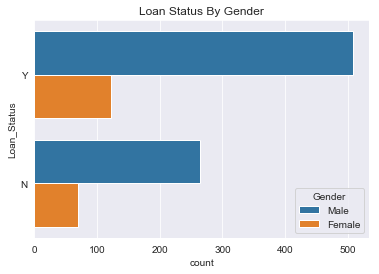

In [26]:
sns.set_style('darkgrid')
countplot = sns.countplot(y = 'Loan_Status', hue = 'Gender', data = loans)
countplot.set_title('Loan Status By Gender')


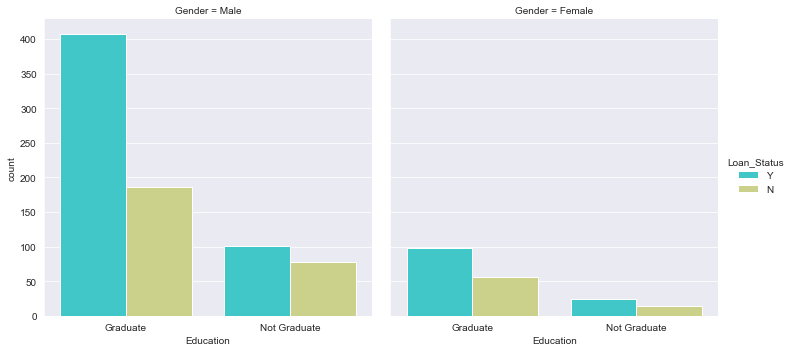

In [27]:
sns.catplot(x='Education', hue = 'Loan_Status', col = 'Gender', data = loans, kind = 'count', palette = 'rainbow')


In [28]:
loans.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data Transformation

In [29]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              965 non-null object
Gender               965 non-null object
Married              965 non-null object
Dependents           965 non-null object
Education            965 non-null object
Self_Employed        965 non-null object
ApplicantIncome      965 non-null int64
CoapplicantIncome    965 non-null float64
LoanAmount           965 non-null float64
Loan_Amount_Term     965 non-null float64
Credit_History       965 non-null float64
Property_Area        965 non-null object
Loan_Status          965 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 145.5+ KB


In [31]:
#drop Loand_ID column
loans_decision_tree_df = loans.drop(['Loan_ID', 'Gender'], axis = 1)

In [32]:
loans_decision_tree_df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
#isolate all columns - you need to remove for now Loan_Status
loans_features = loans_decision_tree_df.drop(['Loan_Status'], axis = 1)

In [34]:
loans_features.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [35]:
loans_answers = loans_decision_tree_df['Loan_Status']
loans_answers.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [36]:
#now split features and answers into training set and test set
train_features, test_features, train_answers, test_answers = train_test_split(loans_features, loans_answers, test_size = 0.3, random_state=143)

In [37]:
train_features.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
748,No,0,Graduate,No,4000,0.0,83.0,84.0,1.0,Semiurban
522,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural
525,Yes,2,Graduate,Yes,17500,0.0,400.0,360.0,1.0,Rural
735,Yes,0,Graduate,No,2333,3803.0,146.0,360.0,1.0,Rural
625,Yes,1,Graduate,No,2185,1516.0,162.0,360.0,1.0,Urban


In [38]:
test_features.shape

(290, 10)

In [39]:
test_answers.shape

(290,)

## Modelling

In [40]:
train_features = pd.get_dummies(train_features)

test_features = pd.get_dummies(test_features)

In [41]:
train_features.shape

(675, 18)

In [42]:
train_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [43]:
test_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [44]:
train_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
748,4000,0.0,83.0,84.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0
522,5677,1424.0,100.0,360.0,1.0,0,1,0,0,0,1,1,0,0,1,1,0,0
525,17500,0.0,400.0,360.0,1.0,0,1,0,0,1,0,1,0,0,1,1,0,0
735,2333,3803.0,146.0,360.0,1.0,0,1,1,0,0,0,1,0,1,0,1,0,0
625,2185,1516.0,162.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1


In [45]:
test_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
957,4700,0.0,80.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0
226,4735,0.0,138.0,360.0,1.0,0,1,1,0,0,0,0,1,0,1,0,0,1
42,2400,0.0,75.0,360.0,0.0,0,1,1,0,0,0,1,0,1,0,0,0,1
32,4692,0.0,106.0,360.0,1.0,1,0,0,1,0,0,1,0,0,1,1,0,0
633,1300,3470.0,100.0,180.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1


In [46]:
train_features.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [47]:
train_answers = np.where(train_answers == 'Y', 1, 0)



In [48]:
train_answers

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [49]:
test_answers = np.where(test_answers == 'Y', 1, 0)

In [50]:
test_answers

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1])

In [54]:
#create decision tree model 
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(train_features, train_answers)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
def plotTree():

    decision_tree_data = export_graphviz(decision_tree_model, out_file = None, feature_names = train_features.columns, filled = True, rounded = True, class_names=['No', 'Yes'])

    graph = graphviz.Source(decision_tree_data)
    
    return graph

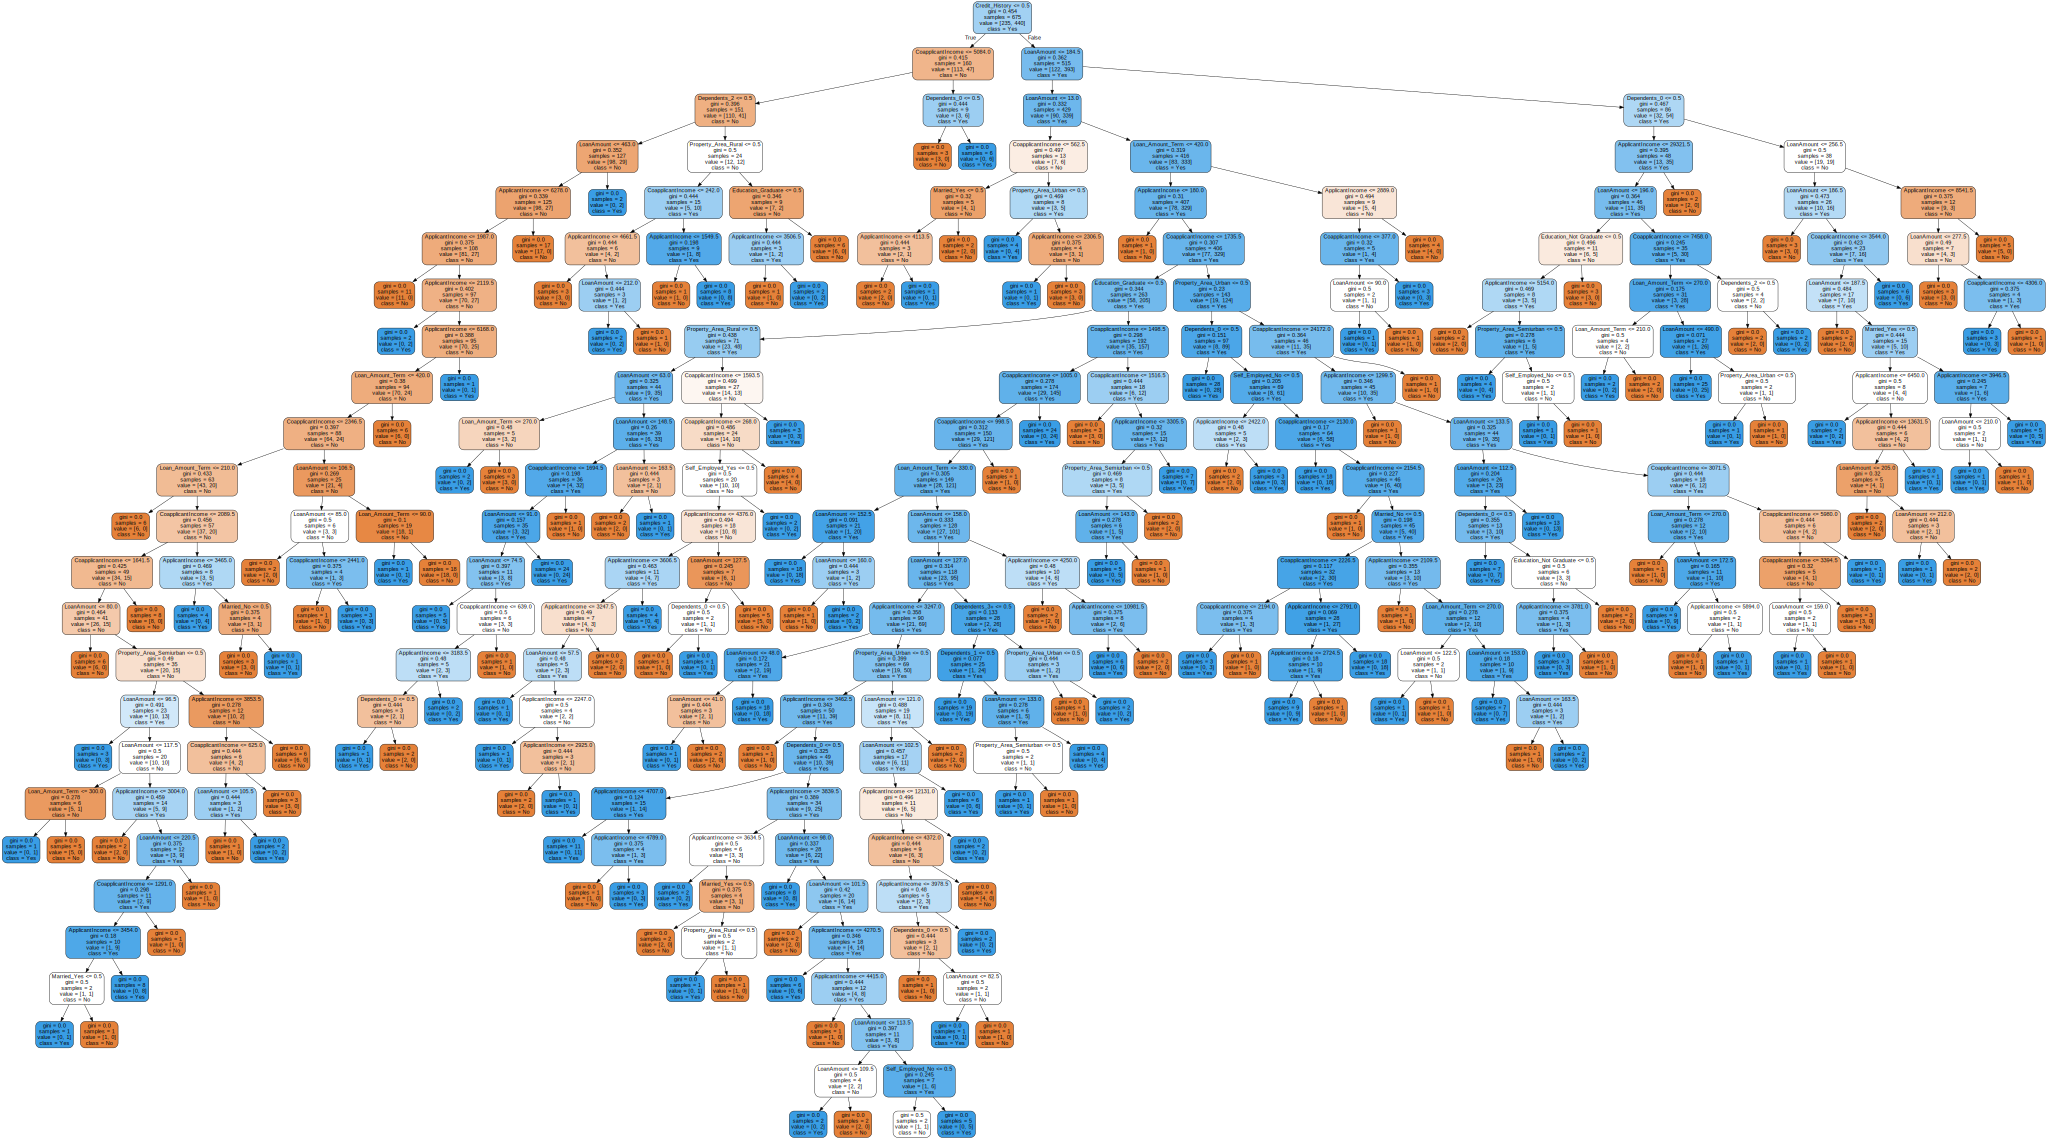

In [65]:
plotTree()

In [68]:
decision_tree_model_shallow = DecisionTreeClassifier(max_depth = 3)

decision_tree_model_shallow.fit(train_features, train_answers)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
def plotTree_shallow():

    decision_tree_data_shallow = export_graphviz(decision_tree_model_shallow, out_file = None, feature_names = train_features.columns, filled = True, rounded = True, class_names=['No', 'Yes'])

    graph = graphviz.Source(decision_tree_data_shallow)
    
    return graph

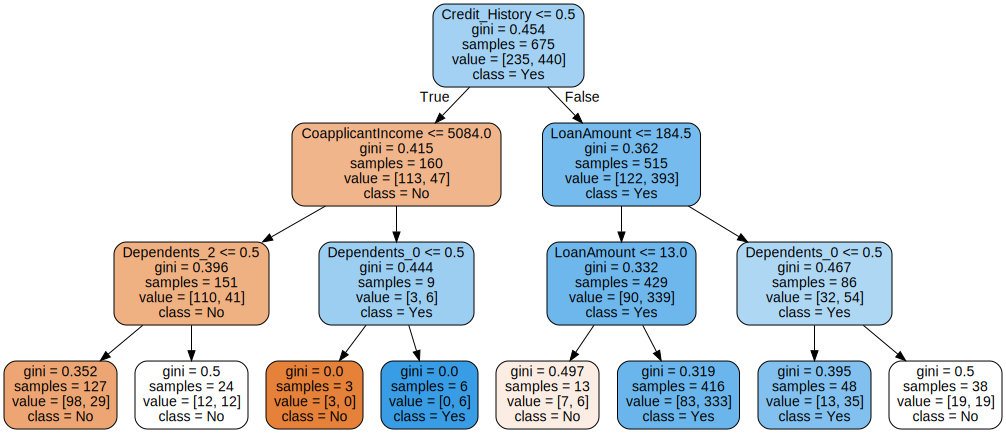

In [70]:
plotTree_shallow()

### Making Predictions

Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

In [71]:
deep_decision_tree_predictions = decision_tree_model.predict(test_features)

In [73]:
print(confusion_matrix(test_answers, deep_decision_tree_predictions))
print(classification_report(test_answers, deep_decision_tree_predictions))

[[ 41  58]
 [ 46 145]]
             precision    recall  f1-score   support

          0       0.47      0.41      0.44        99
          1       0.71      0.76      0.74       191

avg / total       0.63      0.64      0.64       290



In [74]:
shallow_decision_tree_predictions = decision_tree_model_shallow.predict(test_features)

In [75]:
print(confusion_matrix(test_answers, shallow_decision_tree_predictions))
print(classification_report(test_answers, shallow_decision_tree_predictions))

[[ 49  50]
 [ 35 156]]
             precision    recall  f1-score   support

          0       0.58      0.49      0.54        99
          1       0.76      0.82      0.79       191

avg / total       0.70      0.71      0.70       290



In [76]:
#shallow tree seems to be better

We need to compare those values with the test set!

## Model Evaluation

Q: Which model is better? 
> A: 


Q: Why?
> A:

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500